In [391]:
# Dependencies
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import tree
import joblib

df = pd.read_csv("./shubman.csv")
df.describe()


,Unnamed: 0.1,Mat,Inns,NO,Runs,Avg,BF,SR,100s,50s,0s,4s,6s
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0000
mean,1.444444,5.791667,10.069444,0.680556,311.875000,32.525417,534.708333,59.163333,0.680556,1.361111,0.666667,36.597222,4.3750
std,1.413107,4.749907,8.319884,0.819247,269.272255,13.512334,461.449322,9.541422,0.728231,1.407280,0.839181,31.712911,4.1603
min,0.000000,1.000000,1.000000,0.000000,21.000000,7.000000,27.000000,36.110000,0.000000,0.000000,0.000000,3.000000,0.0000
25%,0.000000,2.000000,4.000000,0.000000,104.500000,26.000000,158.000000,55.690000,0.000000,0.000000,0.000000,14.000000,1.0000
50%,1.000000,4.000000,7.000000,0.000000,233.000000,32.890000,399.500000,58.525000,1.000000,1.000000,0.000000,27.500000,3.5000
75%,2.000000,8.000000,14.000000,1.000000,436.250000,39.250000,727.000000,60.957500,1.000000,2.000000,1.000000,51.250000,6.2500
max,5.000000,16.000000,30.000000,2.000000,921.000000,80.000000,1578.000000,91.170000,2.000000,4.000000,2.000000,108.000000,13.0000


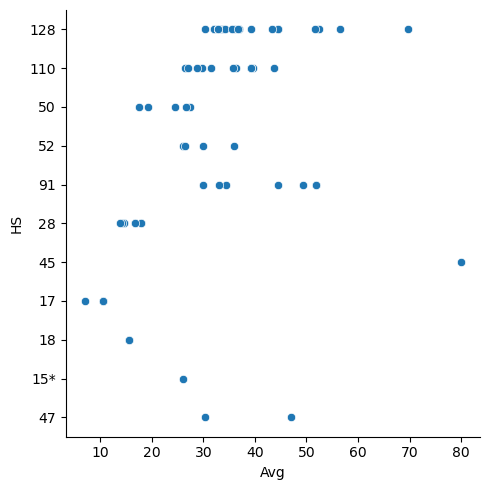

In [392]:
# Drawing plots to eastablish relationships - Use for testing
import seaborn as sns

sns.relplot(x = "Avg", y = "HS", data = df)

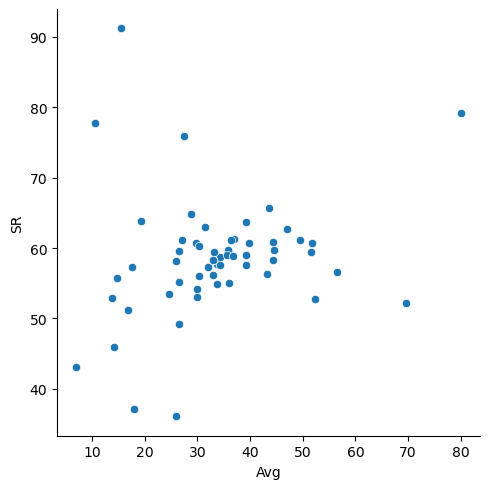

In [393]:
# Linear Relationship - with outliers
sns.relplot(x = "Avg", y = "SR", data = df)

In [394]:
df

,Unnamed: 0.1,Unnamed: 0,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,0,overview,2020-2023,16,30,2,921,128,32.89,1578,58.36,2,4,2,108,13
1,0,vs Australia,2020-2023,6,11,1,444,128,44.40,729,60.90,1,2,0,55,3
2,1,vs Bangladesh,2022-2022,2,4,0,157,110,39.25,266,59.02,1,0,0,14,4
3,2,vs England,2021-2022,5,9,1,140,50,17.50,244,57.37,0,1,2,20,3
4,3,vs New Zealand,2021-2021,3,6,0,180,52,30.00,339,53.09,0,1,0,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,tournament finals,2021-2023,2,4,0,67,28,16.75,131,51.14,0,0,0,7,0
68,1,preliminary matches,2020-2023,14,26,2,854,128,35.58,1447,59.01,2,4,2,101,13
69,0,1st position,2021-2022,3,4,0,28,17,7.00,65,43.07,0,0,1,5,0
70,1,2nd position,2020-2023,14,25,2,846,128,36.78,1438,58.83,2,4,1,99,12


In [555]:
# Statistic considered to predict = Avg

# Input set - have to ignore HS
X = df.drop(columns = ["Avg", "Unnamed: 0", "Unnamed: 0.1", "Span", "HS"])

# Output set
y = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'BF', 'SR', '100s', '50s', '0s', '4s', '6s'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create + Train Model - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# R^2 Accuracy Score - In %
r2 = r2_score(y_test, predictions)

# Mean Squared Error - Smaller the better
mse = mean_squared_error(y_test, predictions)

print(r2 * 100, mse)

30.904125433425754 193.25501439370674
